# Training a classifier with gaze features for calculating predictions of various activities

__UbiComp Assignment 02, Task 01:__
This third notebook trains a classifier with select features and corresponding labels.\
The features and labels are read from a given csv-file.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read data from a csv-file.

Note that the csv-file we are using here is generated by the FeatureCalculation Notebook.

In [6]:
import os
import pandas as pd

recording_location = './'

all_features_csv = os.path.join(recording_location, '/content/drive/MyDrive/assignment2/feature_list_all.csv')
df = pd.read_csv(all_features_csv)

In [7]:
# Uncomment the following lines to see all columns of the csv file (i.e., the features and labels)
print("Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:")
list(df.columns)

Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:


['meanFix',
 'minFix',
 'maxFix',
 'varFix',
 'stdFix',
 'meanDis',
 'minDis',
 'maxDis',
 'varDis',
 'stdDisp',
 'freqDisPerSec',
 'number_of_blinks',
 'blinkMean',
 'blinkMin',
 'blinkMax',
 'blinkRate',
 'xDir',
 'yDir',
 'fixDensPerBB',
 'label',
 'duration',
 'participant_id']

In [8]:
from IPython.display import display

read_df = df[df.label == 'Reading']
inspect_df = df[df.label == 'Inspection']
search_df = df[df.label == 'Search']

#print("Sample reading data:")
#display(read_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample inspection data:")
#display(inspect_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample search data:")
#display(search_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

## For the classification we used a modified version of [an SVM cassifier.](https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02)
First, we need to include some libraries

In [9]:
#
#Importing the necessary packages and libaries
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np

## Let's store the labels and six selected features (among nineteen as denoted in the csv file)

In [10]:
features = df[["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"]]
labels = df ['label']

## This is how the features and labels look

In [11]:
print("Features:")
display(features.head(10))
print("Labels:")
display(labels.head(10))

Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
0,250.882353,666,16554.228164,0.484848,0.606061,369.479986
1,246.742857,900,23549.020168,0.529412,0.529412,363.711018
2,237.257143,1067,36627.431933,0.441176,0.558824,266.246748
3,293.137931,767,35208.551724,0.500000,0.500000,319.553727
4,199.125000,566,12614.163462,0.589744,0.487179,305.832090
5,262.562500,867,36411.415323,0.516129,0.580645,236.757891
6,204.175000,733,16987.430128,0.538462,0.512821,445.453567
7,221.540541,733,19568.977477,0.583333,0.500000,538.273012
8,430.095238,2567,322794.690476,0.800000,0.450000,77.460002
9,227.805556,533,8651.246825,0.914286,0.457143,132.320562


Labels:


0    Inspection
1    Inspection
2    Inspection
3    Inspection
4    Inspection
5    Inspection
6    Inspection
7    Inspection
8       Reading
9       Reading
Name: label, dtype: object

## Let's normalize the features (i.e., each column indivudally)

In [12]:
scaler = MaxAbsScaler()
scaler.fit(features)
scaled = scaler.transform(features)
scaled_features = pd.DataFrame(scaled, columns=features.columns)
print("Normalized Features:")
display(scaled_features.head(10))

Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
0,0.412048,0.144783,0.013814,0.527009,0.743802,0.238355
1,0.405249,0.195652,0.019651,0.575448,0.649733,0.234633
2,0.389670,0.231957,0.030564,0.479540,0.685829,0.171758
3,0.481448,0.166739,0.029380,0.543478,0.613636,0.206147
4,0.327042,0.123043,0.010526,0.641026,0.597902,0.197295
5,0.431232,0.188478,0.030384,0.561010,0.712610,0.152735
6,0.335336,0.159348,0.014175,0.585284,0.629371,0.287366
7,0.363857,0.159348,0.016330,0.634058,0.613636,0.347245
8,0.706387,0.558043,0.269361,0.869565,0.552273,0.049970
9,0.374147,0.115870,0.007219,0.993789,0.561039,0.085361


## Let's split the data and have two sets, one for training the model and one for testing it.

In [13]:
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=0.8, random_state = 0, stratify=labels)

# Uncomment the following line if you want to work with normalized features. You will note how the accuracy and confusion matrix changes
# feature_train, feature_test, label_train, label_test = train_test_split(scaled_features, labels, train_size=0.8, random_state = 0, stratify=labels)

## We can work with different SVM-kernels:

In [14]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(feature_train, label_train)

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=0).fit(feature_train, label_train)

In [18]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0).fit(feature_train, label_train)

## Lets collect the predictions from test data. . .

In [20]:
linear_pred = linear.predict(feature_test)
poly_pred = poly.predict(feature_test)
rbf_pred = rbf.predict(feature_test)
sig_pred = sig.predict(feature_test)

rf_pred = rf.predict(feature_test)
ada_pred = ada.predict(feature_test)

## . . . and have a look at the accuracy of each one:

In [21]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(feature_test, label_test)
accuracy_poly = poly.score(feature_test, label_test)
accuracy_rbf = rbf.score(feature_test, label_test)
accuracy_sig = sig.score(feature_test, label_test)
accuracy_rf = rf.score(feature_test, label_test)
accuracy_ada = ada.score(feature_test, label_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)
print("Accuracy Random Forest: ", accuracy_rf)
print("Accuracy AdaBoost: ", accuracy_ada)

Accuracy Linear Kernel: 0.7792207792207793
Accuracy Polynomial Kernel: 0.37662337662337664
Accuracy Radial Basis Kernel: 0.33766233766233766
Accuracy Sigmoid Kernel: 0.4025974025974026
Accuracy Random Forest:  0.8441558441558441
Accuracy AdaBoost:  0.8961038961038961


## This is how the confusion matrix of each predictor looks like

In [22]:
# creating a confusion matrix
cm_lin = confusion_matrix(label_test, linear_pred)
cm_poly = confusion_matrix(label_test, poly_pred)
cm_rbf = confusion_matrix(label_test, rbf_pred)
cm_sig = confusion_matrix(label_test, sig_pred)
cm_rf = confusion_matrix(label_test, rf_pred)
cm_ada = confusion_matrix(label_test, ada_pred)

print("CM Linear:")
print(cm_lin)
print("CM Polynomial:")
print(cm_poly)
print("CM Radial:")
print(cm_rbf)
print("CM Sigmoid:")
print(cm_sig)
print("CM Random Forest")
print(cm_rf)
print("CM AdaBoost")
print(cm_ada)

CM Linear:
[[22  0  4]
 [ 2 21  3]
 [ 7  1 17]]
CM Polynomial:
[[ 1  7 18]
 [ 0  4 22]
 [ 0  1 24]]
CM Radial:
[[ 0 26  0]
 [ 0 26  0]
 [ 0 25  0]]
CM Sigmoid:
[[13  9  4]
 [18  3  5]
 [ 8  2 15]]
CM Random Forest
[[22  0  4]
 [ 1 25  0]
 [ 6  1 18]]
CM AdaBoost
[[22  0  4]
 [ 1 25  0]
 [ 3  0 22]]


## A more colorful confusion matrix for the linear predictor

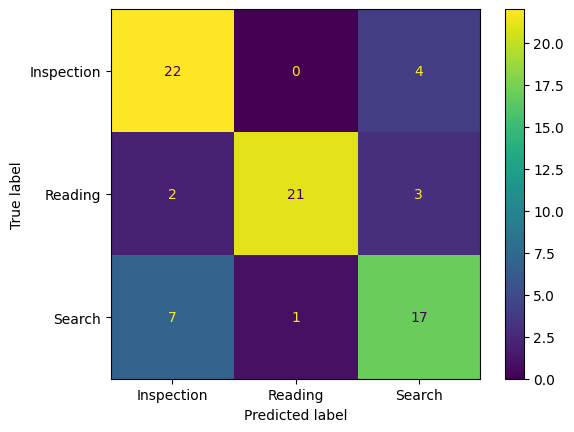

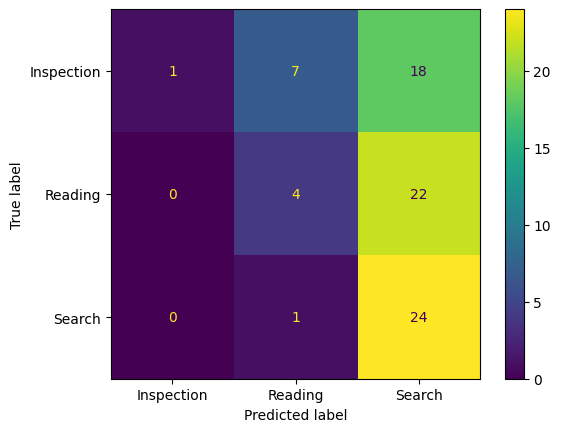

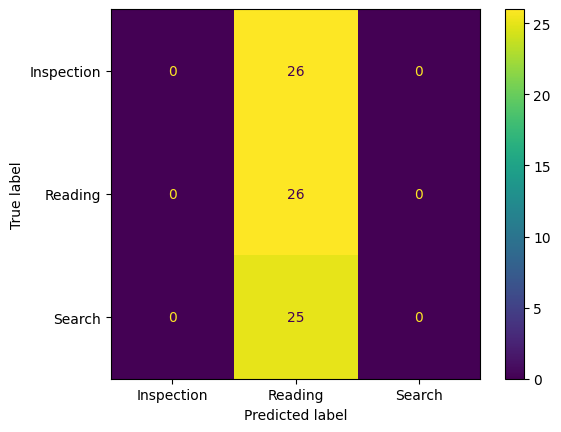

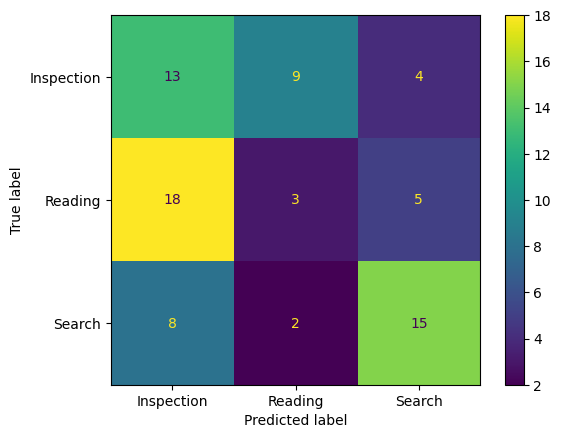

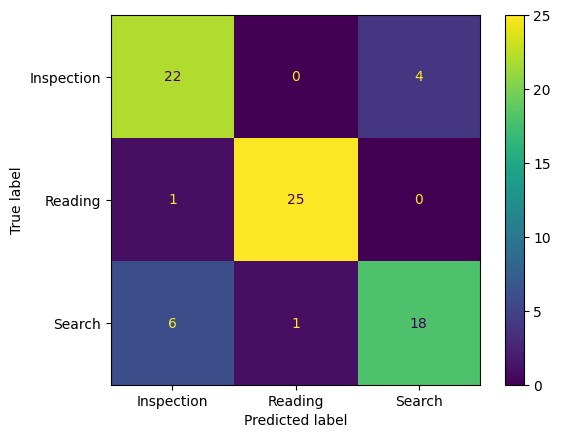

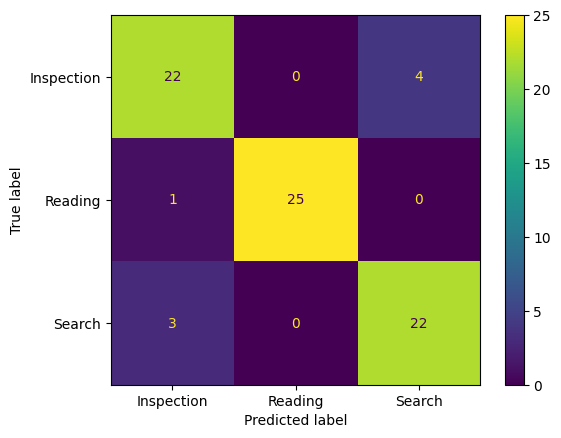

In [23]:
ConfusionMatrixDisplay.from_estimator(linear, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(poly, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(rbf, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(sig, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(rf, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(ada, feature_test, label_test)

## Finally, let's make a cross check

In [24]:
feature_test.head()

,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
190,287.344828,834,33900.162562,0.464286,0.535714,321.471684
298,302.576923,1000,43935.453846,0.560000,0.400000,107.777317
162,214.676471,500,10864.407308,0.575758,0.545455,62.731734
188,205.315789,533,14931.519203,0.486486,0.486486,264.981725
92,209.250000,634,18731.850000,0.628571,0.685714,118.705912


In [25]:
linear.predict(np.array(features.iloc[59]).reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Inspection'], dtype=object)

## Let's detect the label (i.e., the activity) of some new features (i.e., that are extracted from a new stream of eye tracking data):

In [26]:
print("New Feature:")
# NOTE that we use a particular feature from the test dataset but this can be replaced with new data e.g., that arrives online and was not included in training or testing the classifier
new_feature = feature_test.tail(2)
display(new_feature)

new_linear_pred = linear.predict_proba(new_feature)
new_linear_pred_2 = linear.predict(new_feature)
print("New Linear Prediction:")
display(new_linear_pred)
display(new_linear_pred_2)

new_poly_pred_2 = poly.predict(new_feature)
new_poly_pred = poly.predict_proba(new_feature)
print("New Poly Prediction:")
display(new_poly_pred)
display(new_poly_pred_2)

new_rbf_pred_2 = rbf.predict(new_feature)
new_rbf_pred = rbf.predict_proba(new_feature)
print("New RBF Prediction:")
display(new_rbf_pred)
display(new_rbf_pred_2)

new_sig_pred_2 = sig.predict(new_feature)
new_sig_pred = sig.predict_proba(new_feature)
print("New Sig Prediction:")
display(new_sig_pred)
display(new_sig_pred_2)

new_rf_pred_2 = rf.predict(new_feature)
new_rf_pred = rf.predict_proba(new_feature)
print("New Random Forest Prediction:")
display(new_rf_pred)
display(new_rf_pred_2)

new_ada_pred_2 = ada.predict(new_feature)
new_ada_pred = ada.predict_proba(new_feature)
print("New AdaBoost Prediction:")
display(new_ada_pred)
display(new_ada_pred_2)

New Feature:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
121,244.161290,600,15356.806452,0.833333,0.333333,106.653398
195,313.592593,734,25422.866097,0.769231,0.461538,123.174128


New Linear Prediction:


array([[0.08657579, 0.53616673, 0.37725748],
       [0.10471277, 0.8188641 , 0.07642312]])

array(['Reading', 'Reading'], dtype=object)

New Poly Prediction:


array([[0.33000429, 0.30981254, 0.36018317],
       [0.33647024, 0.30961814, 0.35391162]])

array(['Search', 'Search'], dtype=object)

New RBF Prediction:


array([[0.33720552, 0.33981214, 0.32298234],
       [0.33720552, 0.33981214, 0.32298234]])

array(['Reading', 'Reading'], dtype=object)

New Sig Prediction:


array([[0.36151844, 0.3238319 , 0.31464966],
       [0.37261131, 0.38380268, 0.24358602]])

array(['Inspection', 'Inspection'], dtype=object)

New Random Forest Prediction:


array([[0.07131885, 0.84797325, 0.0807079 ],
       [0.08901043, 0.84645339, 0.06453618]])

array(['Reading', 'Reading'], dtype=object)

New AdaBoost Prediction:


array([[0.21957406, 0.4564633 , 0.32396263],
       [0.16951591, 0.55743797, 0.27304612]])

array(['Reading', 'Reading'], dtype=object)